In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn


!pip install plotly
import plotly as pl
import plotly.express as px
import sys
print(sys.path)

['F:\\FHNW\\krankenkassechallenge', 'C:\\ProgramData\\Anaconda3\\python37.zip', 'C:\\ProgramData\\Anaconda3\\DLLs', 'C:\\ProgramData\\Anaconda3\\lib', 'C:\\ProgramData\\Anaconda3', '', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bruno\\.ipython']


# PCA with sklearn and factorized data

In [43]:
#Standardize

data = pd.read_csv("krankenkasse-mit-pbf.csv", sep = ";", names = ['age', 'sex', 'bmi', 'children', 'smoker', 'canton', "pbf", 'charges'])
data = data.iloc[1:]

data['charges'] = data['charges'].str.replace("’", "").apply(pd.to_numeric)
data['pbf'] = data['pbf'].apply(pd.to_numeric)
data['bmi'] = data['bmi'].apply(pd.to_numeric)
data['age'] = data['age'].apply(pd.to_numeric)
data['children'] = data['children'].apply(pd.to_numeric)

# Encode categorical variables.
data["sex"] = pd.factorize(data['sex'])[0]
data["smoker"] = pd.factorize(data['smoker'])[0]

data['canton'] = pd.factorize(data['canton'])[0]

# Remove encoded categorical variables.

# 1 record with negative percentage of body fat.
data = data[data["pbf"]>0]

data.head()

,age,sex,bmi,children,smoker,canton,pbf,charges
1,19,0,24.720,0,0,0,35.94,4253
2,18,1,29.416,1,1,1,26.86,2494
3,28,1,28.800,3,1,1,26.92,3138
4,33,1,20.564,0,1,2,7.98,1553
5,32,1,25.504,0,1,2,21.84,2768


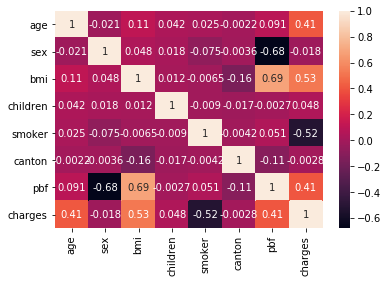

In [44]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

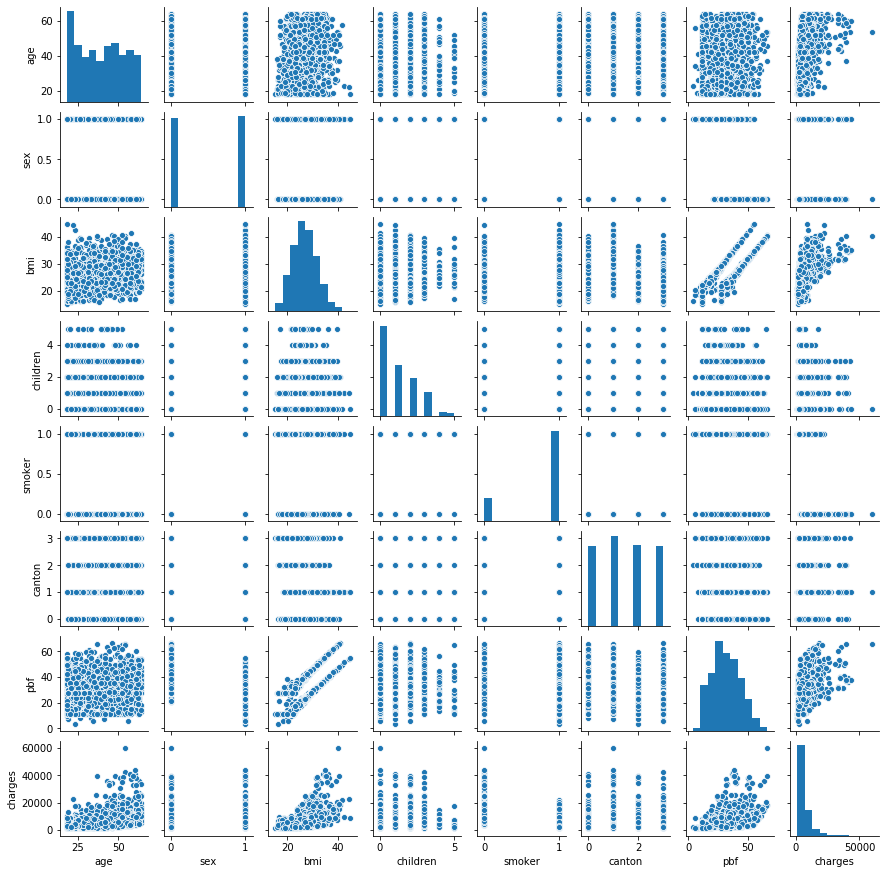

In [45]:
sn.pairplot(data, height=1.5)

### Standardize data with Standardscaler

In [56]:
features = ['charges', 'age', 'bmi', 'sex', 'pbf', 'children', 'smoker', 'canton']

x = data.loc[:, features].values
y = data.loc[:, ['charges']].values
x = StandardScaler().fit_transform(x)
x
pd.DataFrame(data = x, columns = features).head()

,charges,age,bmi,sex,pbf,children,smoker,canton
0,-0.408956,-1.438295,-0.455136,-1.009771,0.353769,-0.909234,-1.974192,-1.345316
1,-0.703542,-1.509470,0.508698,0.990324,-0.403891,-0.079442,0.506536,-0.439632
2,-0.595689,-0.797722,0.382267,0.990324,-0.398884,1.580143,0.506536,-0.439632
3,-0.861134,-0.441848,-1.308138,0.990324,-1.979288,-0.909234,0.506536,0.466051
4,-0.657654,-0.513023,-0.294223,0.990324,-0.822773,-0.909234,0.506536,0.466051


### Let's calcualte the principal components using PCA() 

[[ 0.50556615  0.23579431  0.50984398 -0.26810632  0.56626155  0.02765315
  -0.1557009  -0.10640686]
 [ 0.4334145   0.23761907  0.02149553  0.55500043 -0.38206795  0.08808418
  -0.53760123  0.06672106]
 [-0.12232874 -0.08220641  0.37550928  0.43986875 -0.04690611  0.15535645
   0.30297124 -0.72502322]
 [-0.00943407  0.62597508 -0.08453384 -0.00681327 -0.05617299  0.6163298
   0.42383027  0.19550927]
 [-0.0166069  -0.4649456  -0.12337041 -0.2052194   0.05927002  0.75408583
  -0.37037871 -0.12990682]
 [-0.01208536 -0.40936209  0.47607129  0.35738837  0.09666668  0.13605293
   0.22915301  0.63050802]
 [ 0.73514077 -0.32471278 -0.31419779 -0.05103213 -0.1454384  -0.01794369
   0.47477323 -0.07694937]
 [-0.02544838  0.01205878 -0.50085875  0.50410004  0.70285607 -0.00078635
  -0.01474355 -0.00244789]]


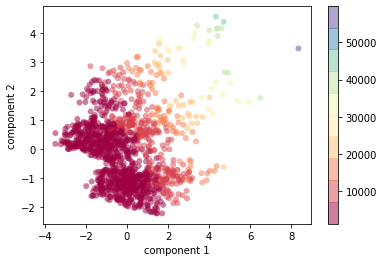

In [57]:
pca = PCA(8)
projected = pca.fit_transform(x)

PCs = pca.components_

print(PCs)

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### What's the explained variance?

In [58]:
print(pca.explained_variance_ratio_)

[0.29346514 0.19016417 0.13533824 0.1286324  0.12165913 0.10712267
 0.0225423  0.00107595]


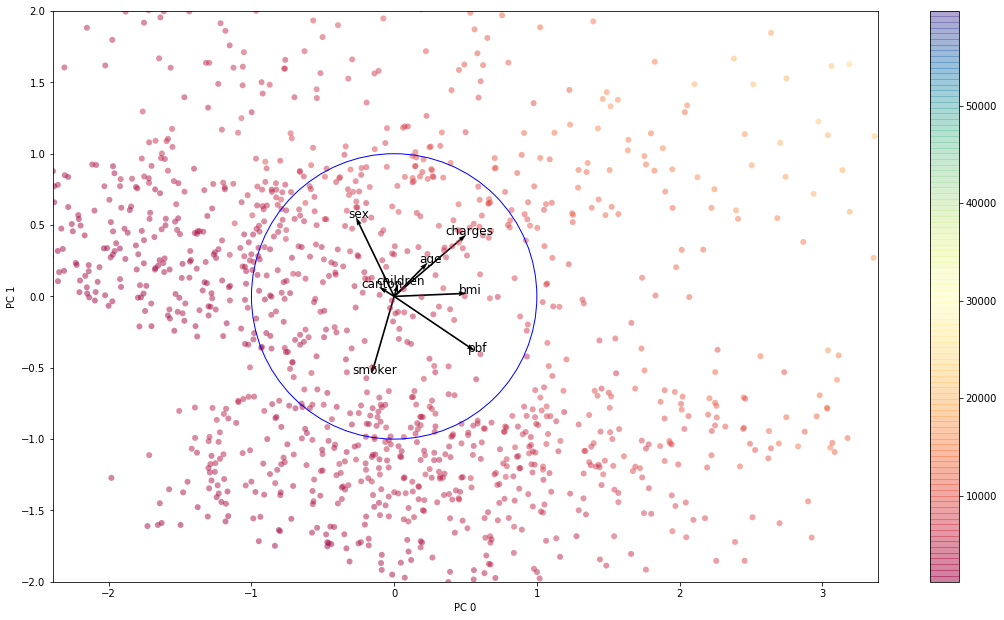

In [59]:
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(6,3))

#vectors
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
    PCs[0,:], PCs[1,:], 
    angles='xy', scale_units='xy', scale=1, width=0.002 )

# Add labels based on feature names (here just numbers)
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, features):
    plt.text(j, i, z, ha='center', va='center', fontsize = "large")

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 100))
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-2.0,3.0])
plt.ylim([-2.0,2.0])

# Label axes
plt.xlabel('PC 0')
plt.ylabel('PC 1')

plt.colorbar();
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

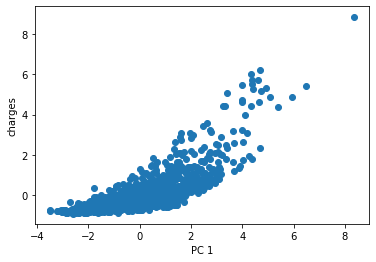

In [73]:
data_pca = pca.transform(x)
plt.scatter(data_pca[:,0], x[:,0])
plt.xlabel('PC 1') and plt.ylabel('charges')
plt.show()

#TODO Manual computation of eigenvalues:

In [16]:
n_samples = x.shape[0]
# We center the data and compute the sample covariance matrix.
x -= np.mean(x, axis=0)
cov_matrix = np.dot(x.T, x) / n_samples
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

1.722360989797095
0.89419889055242


Even easier with np.linalg.eig of covariance matrix:

In [17]:
centered_matrix = x - x.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

x

array([[-1.43876426, -0.45332   , -0.40875011],
       [-1.50996545,  0.5096211 , -0.70342506],
       [-0.79795355,  0.38330685, -0.59553952],
       ...,
       [-1.50996545,  1.0148781 , -0.61430222],
       [-1.29636188, -0.79781341, -0.75133696],
       [ 1.55168573, -0.26138796,  2.0629009 ]])